In [1]:
import numpy as np, prjlib, plottools as pl, healpy as hp, curvedsky, tools_lens, tools_delens, tools_multitracer, binning
from matplotlib.pyplot import *

In [28]:
snmin, snmax = 1, 100
olmax = 1024
ntypes = ['base','base_iso','goal','goal_iso']
labels = ['Baseline','','Goal','']
colors = ['orange','orange','blue','blue']
lines  = ['-','--','-','--']

In [3]:
d = prjlib.data_directory()
dobj = {}
for ntype in ntypes:
    Ntype = ntype.replace('_id','')+'_roll50'
    #if 'id' in ntype: 
    #    telescope = 'id'
    #else:
    #    telescope = 'la'
    p = prjlib.analysis_init(t='la',freq='com',fltr='none',snmin=snmin,snmax=snmax,ntype=Ntype)
    pE = prjlib.analysis_init(t='co',freq='com',fltr='cinv',ntype=Ntype.replace('_iso',''))
    qobj = tools_lens.init_qobj(p.stag,'False',rlmin=300,rlmax=4096)
    mobj = tools_multitracer.mass_tracer(p,qobj,add_cmb=['TT','TE','EE','EB'])
    #dobj[ntype,'cmb'] = tools_delens.init_template(p.stag+qobj.ltag,mobj.klist,pE.stag,False,klist=['TT','TE','EE','EB'],kfltr='none',elmin=50)
    dobj[ntype,'all'] = tools_delens.init_template(p.stag+qobj.ltag,mobj.klist,pE.stag,False,klist=['comb'],kfltr='none',elmin=50)
    print(dobj[ntype,'all'].frho)

/project/projectdirs/sobs/delensing/delensb/aps/rho_comb_le50-2048_lk20-2048_none_lacom_base_roll50_mv3_a5.0deg_none_l300-4096_TT-TE-EE-EB-g0-g1-g2-g3-g4-g5-cib_cocom_base_roll50_cinv
/project/projectdirs/sobs/delensing/delensb/aps/rho_comb_le50-2048_lk20-2048_none_lacom_base_iso_roll50_mv3_a5.0deg_none_l300-4096_TT-TE-EE-EB-g0-g1-g2-g3-g4-g5-cib_cocom_base_roll50_cinv
/project/projectdirs/sobs/delensing/delensb/aps/rho_comb_le50-2048_lk20-2048_none_lacom_goal_roll50_mv3_a5.0deg_none_l300-4096_TT-TE-EE-EB-g0-g1-g2-g3-g4-g5-cib_cocom_goal_roll50_cinv
/project/projectdirs/sobs/delensing/delensb/aps/rho_comb_le50-2048_lk20-2048_none_lacom_goal_iso_roll50_mv3_a5.0deg_none_l300-4096_TT-TE-EE-EB-g0-g1-g2-g3-g4-g5-cib_cocom_goal_roll50_cinv


In [4]:
r = {}
for ntype in ntypes:
    r[ntype] = 0
    for i in range(snmin,snmax+1):
        BB, TT, BT = np.loadtxt(dobj[ntype,'all'].cl['comb'][i],unpack=True)
        r[ntype] += BT**2/BB/TT/(snmax-snmin+1)

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


In [14]:
rb = {}
mb = binning.multipole_binning(20,lmin=5,lmax=200)
for ntype in ntypes:
    rb[ntype] = binning.binning(r[ntype],mb)

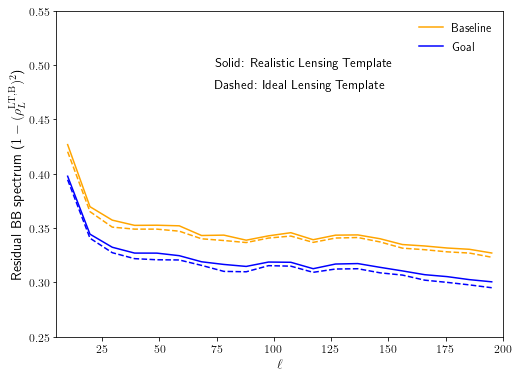

In [30]:
pl.plot_1dstyle(usetex=True,fsize=[8,6],xmin=5,xmax=200,ymin=1-.75,ymax=1-.45,xticks_labsize=12,yticks_labsize=12,legend_size=12,xlab=r'$\ell$',ylab=r'Residual BB spectrum ($1-(\rho_L^{\rm LT,B})^2$)')
for ntype, label, color, ls in zip(ntypes,labels,colors,lines):
    plot(mb.bc,1-rb[ntype],label=label,color=color,ls=ls)
legend(loc=0)
figtext(0.4,0.75,'Solid: Realistic Lensing Template',fontsize=13)
figtext(0.4,0.70,'Dashed: Ideal Lensing Template',fontsize=13)
savefig('fig_BB_correlation.pdf')